# Step Forward Cross Validation for Bioactivity Predictions

## Implementation of Novelty Error

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

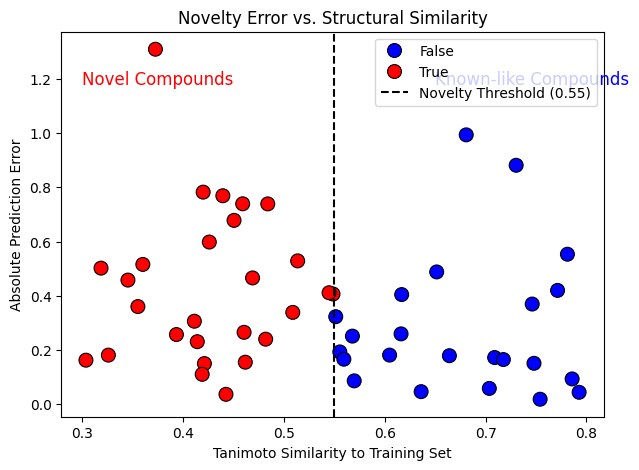

In [14]:
true_pIC50 = np.random.uniform(4.5, 8.5, 50)
pred_pIC50 = true_pIC50 + np.random.normal(0, 0.5, 50)  # Add some noise
np.random.seed(42)
tanimoto_similarity = np.random.uniform(0.3, 0.8, 50)  # Random similarity scores
absolute_error = np.abs(pred_pIC50 - true_pIC50)
threshold = 0.55
is_novel = tanimoto_similarity < threshold
plt.figure(figsize=(7, 5))
sns.scatterplot(x=tanimoto_similarity, y=absolute_error, hue=is_novel,
                palette={True: "red", False: "blue"}, s=100, edgecolor="black")
plt.axvline(threshold, linestyle="dashed", color="black", linewidth=1.5, label="Novelty Threshold (0.55)")
plt.text(0.3, max(absolute_error) * 0.9, "Novel Compounds", color="red", fontsize=12)
plt.text(0.65, max(absolute_error) * 0.9, "Known-like Compounds", color="blue", fontsize=12)
plt.xlabel("Tanimoto Similarity to Training Set")
plt.ylabel("Absolute Prediction Error")
plt.title("Novelty Error vs. Structural Similarity")
plt.legend()
plt.savefig("../benchmark/results/figures/novelty_error_illustration.svg", format="svg")
plt.show()

This SVG was edited with Inkscape to produce illustration for discovery yield

The Novelty Error (NE) measures the fraction of incorrectly classified discovery compounds whose predicted  $pK_i$  values deviate beyond the defined error threshold.


In [3]:
def compute_novelty_error(df, true_col="true_pIC50", pred_col="pred_pIC50", similarity_col="tanimoto_similarity",
                          threshold=0.55):
    """
    Computes Novelty Error: Mean absolute error (MAE) on structurally novel compounds
    (i.e., those with Tanimoto similarity < threshold).

    Parameters:
    - df (pd.DataFrame): DataFrame containing true pIC50, predicted pIC50, and Tanimoto similarity.
    - true_col (str): Column name for true pIC50 values.
    - pred_col (str): Column name for predicted pIC50 values.
    - similarity_col (str): Column name for Tanimoto similarity values.
    - threshold (float): Similarity threshold for novelty (default = 0.55).

    Returns:
    - novelty_error (float): Novelty Error (mean absolute error for novel compounds).
    """
    # Select novel compounds (Tanimoto similarity < threshold)
    novel_df = df[df[similarity_col] < threshold]

    # Compute Mean Absolute Error (MAE) for novel compounds
    novelty_error = (abs(novel_df[pred_col] - novel_df[true_col])).mean()

    return novelty_error if not novel_df.empty else None